In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import boa.datasets.labels.fft as fft
import boa.datasets.labels.stencil3d as stencil3d
import boa.datasets.labels.gemm as gemm
import boa.datasets.labels.smaug as smaug

In [2]:
save_folder = "../plots/notebook_plots/dataset_viz/"

In [3]:
# Generate histograms summarizing data
def generate_histograms(data: pd.DataFrame, name: str, show=True, save=True):
    num_plots = len(data.columns)
    num_cols = 4
    num_rows = num_plots // num_cols + bool(num_plots % num_cols)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 4))
    fig.suptitle(f"Plot of {name}", fontsize=18)

    for column, ax in zip(data, axes.flatten()):
        ax.hist(data[column], bins=50, density=False, edgecolor='black')
        ax.set_xlabel(column)

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    
    fig_path = save_folder + name + ".pdf"
    
    if save:
        fig.savefig(fig_path)
        print(f"Saved figure to {fig_path}!")
    
    if show:
        fig.show()

In [4]:
def analysis(dataset_path: str, 
             name: str, 
             sep: str,
             input_labels,
             output_labels):
    
    with open(dataset_path) as f:
        df = pd.read_csv(f, sep=sep, dtype=np.float64)

    print("==============================================")
    print(f"Summary: {name}")
    print("----------------------------------------------")
    print('Number of rows:', len(df))
    print()

    duplicated_rows = df.duplicated(keep=False)
    print('Duplicated rows:', sum(duplicated_rows))
    print()

    all_the_same = df.apply(func=lambda c: all(c[0] == c), axis=0)
    print('Only one value in columns:', all_the_same[all_the_same].index.tolist())
    print()
    
    
    
    df = df[input_labels + output_labels]

    print('Final inputs:', input_labels)
    print()
    print('Final outputs:', output_labels)
    print("==============================================\n")

    generate_histograms(df[input_labels], name=f'{name}_inputs', show=True, save=True)
    generate_histograms(df[output_labels], name=f'{name}_outputs', show=True, save=True)

In [5]:
fft_path = "../resources/fft_dataset.csv"
stencil3d_path = "../resources/stencil3d_dataset.csv"
gemm_path = "../resources/gemm_dataset.csv"
smaug_path = "../resources/smaug_dataset.csv"

# Analysis of the FFT dataset

Summary: fft
----------------------------------------------
Number of rows: 6962

Duplicated rows: 0

Only one value in columns: ['num_trigonometric_units', 'num_bit-wise_operators_32', 'num_shifters_32']

Final inputs: ['cycle_time', 'pipelining', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'cache_line_sz', 'cache_queue_size', 'tlb_hit_latency', 'tlb_miss_latency', 'tlb_page_size', 'tlb_entries', 'tlb_max_outstanding_walks', 'tlb_assoc', 'tlb_bandwidth', 'l2cache_size', 'enable_l2', 'pipelined_dma', 'ignore_cache_flush']

Final outputs: ['cycle', 'avg_power', 'idle_fu_cycles', 'avg_fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_double_precision_fp_multipliers', 'num_double_precision_fp_adders', 'num_trigonometric_units', 'num_bit-wise_operators_32', 'num_shifters_32', 'num_registers_32']

Saved figure to ../plots/notebook_plots/dataset_viz/fft_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Saved figure to ../plots/notebook_plots/dataset_viz/fft_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


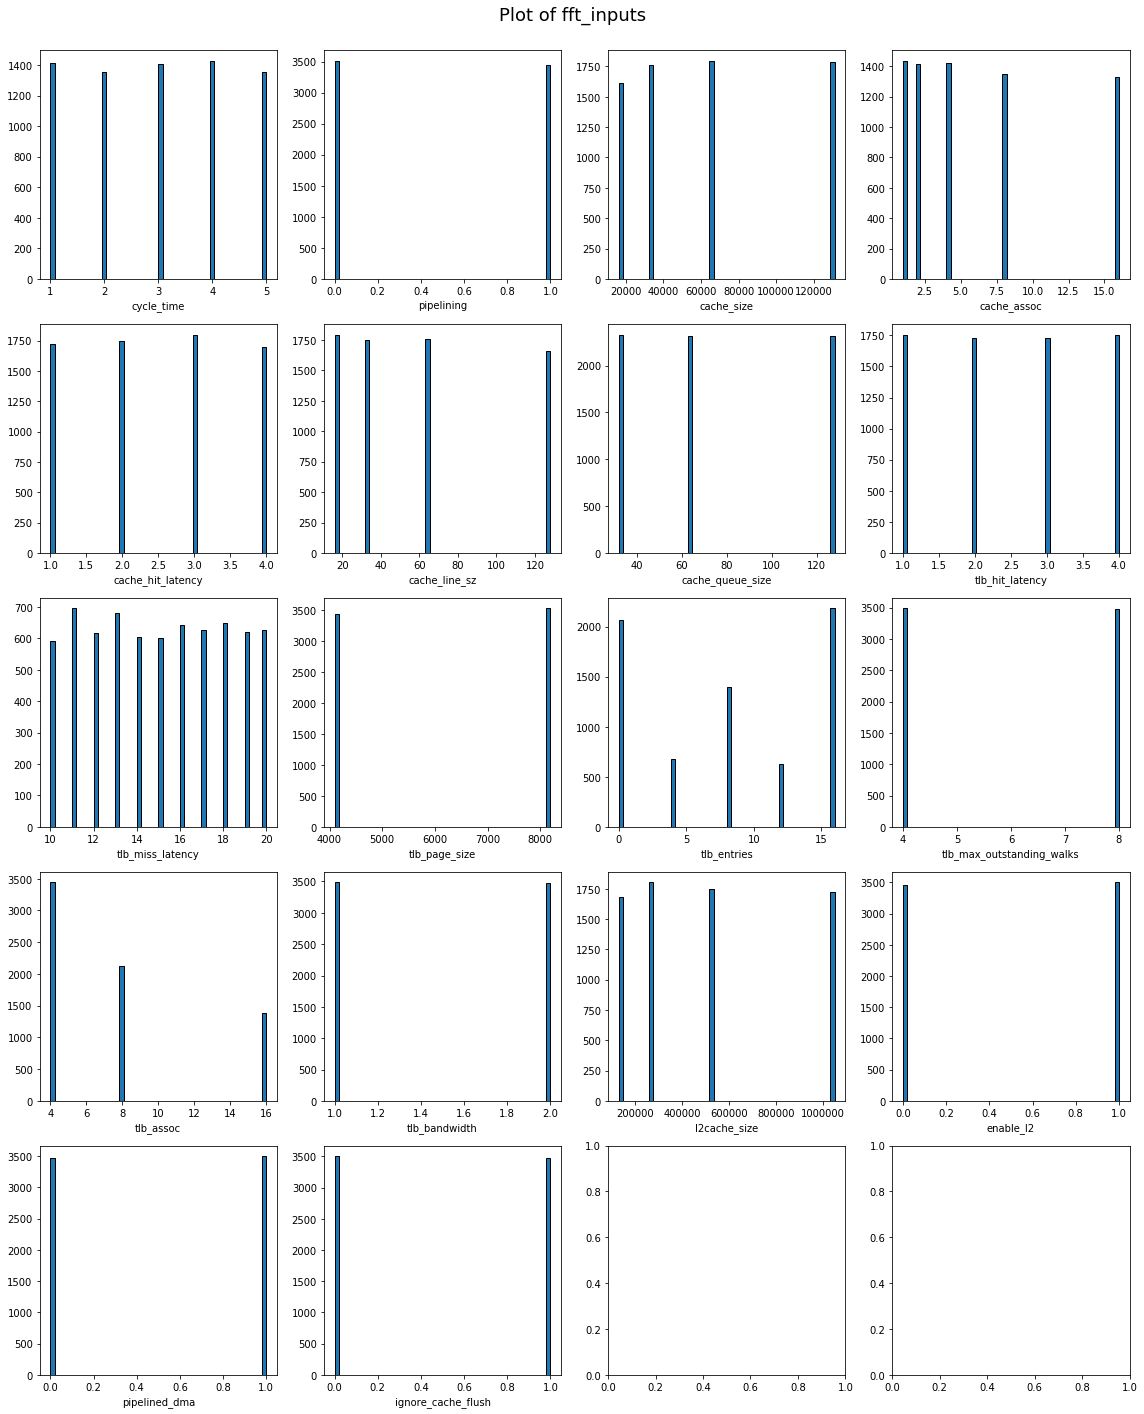

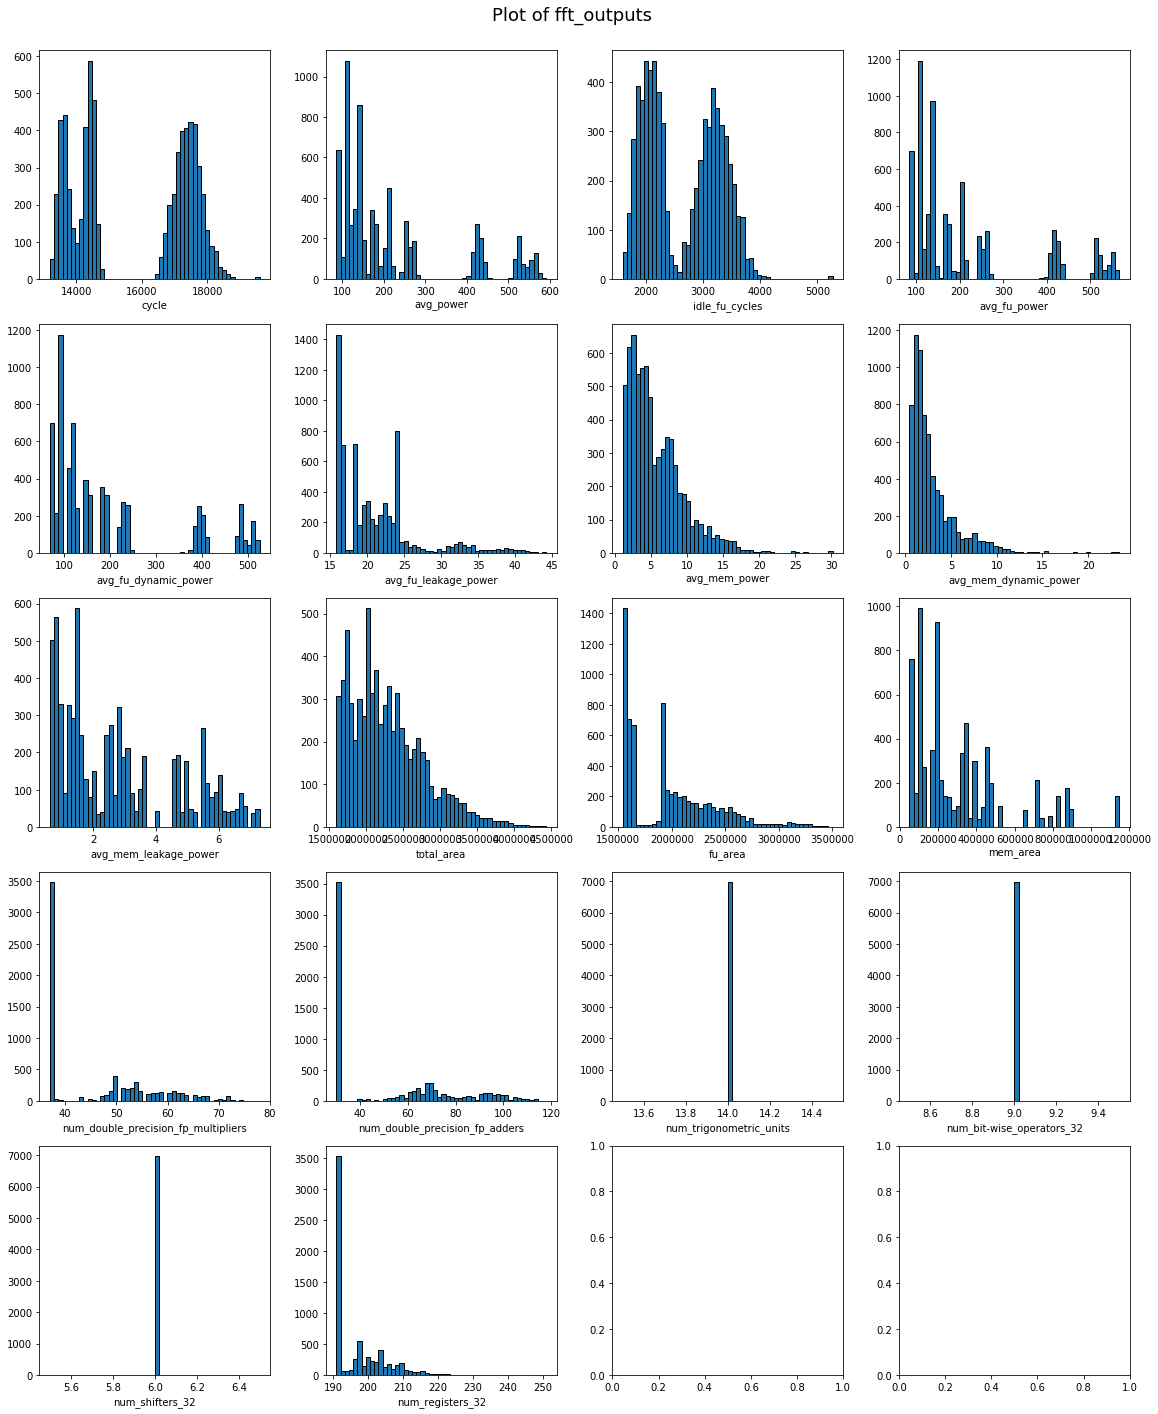

In [7]:
analysis(dataset_path=fft_path,
         name="fft",
         sep=" ",
         input_labels=fft.input_labels,
         output_labels=fft.output_labels)

# Analysis of the Stencil3D dataset

Summary: stencil3d
----------------------------------------------
Number of rows: 10799

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter']

Final inputs: ['cycle_time', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'tlb_hit_latency', 'tlb_entries', 'l2cache_size']

Final outputs: ['cycle', 'avg_power', 'fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_register']

Saved figure to ../plots/notebook_plots/dataset_viz/stencil3d_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Saved figure to ../plots/notebook_plots/dataset_viz/stencil3d_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


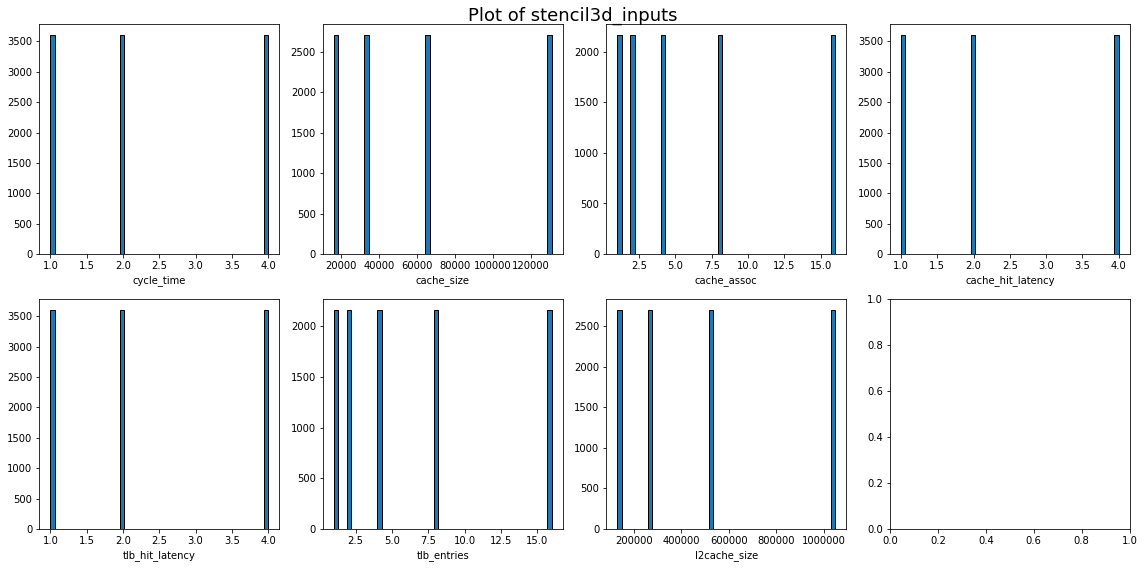

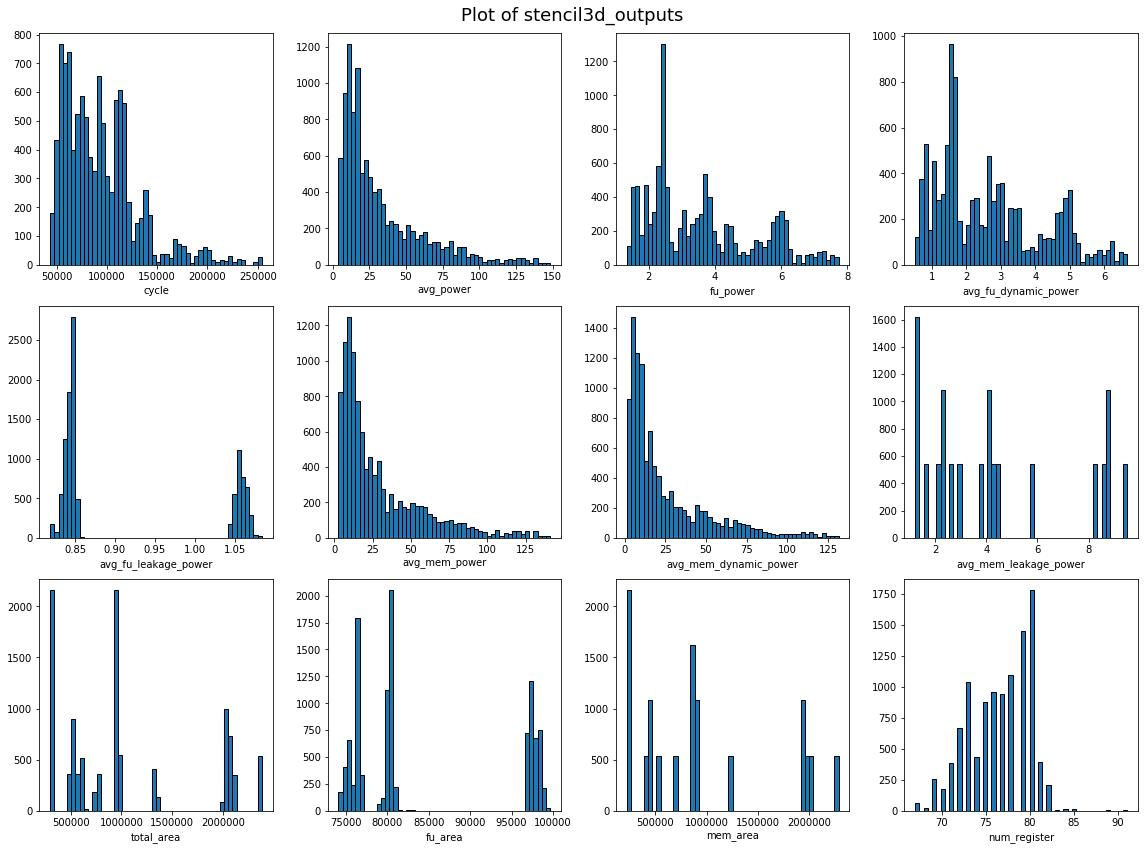

In [8]:
analysis(dataset_path=stencil3d_path,
         name="stencil3d",
         sep="\t",
         input_labels=stencil3d.input_labels,
         output_labels=stencil3d.output_labels)

Summary: gemm
----------------------------------------------
Number of rows: 10799

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter']

Final inputs: ['cycle_time', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'tlb_hit_latency', 'tlb_entries', 'l2cache_size']

Final outputs: ['cycle', 'avg_power', 'fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_register']

Saved figure to ../plots/notebook_plots/dataset_viz/gemm_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Saved figure to ../plots/notebook_plots/dataset_viz/gemm_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


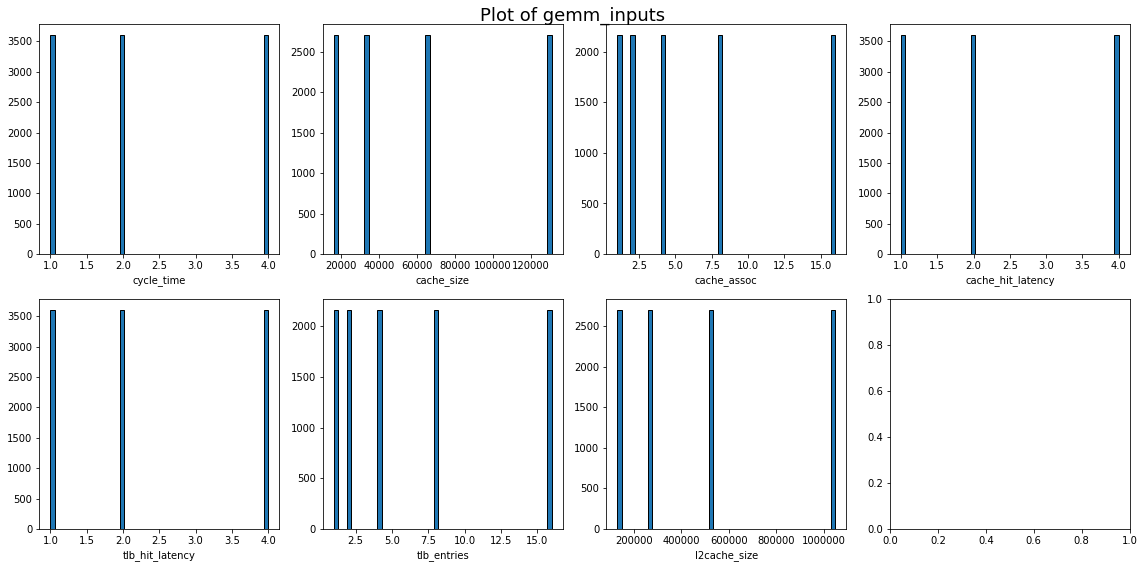

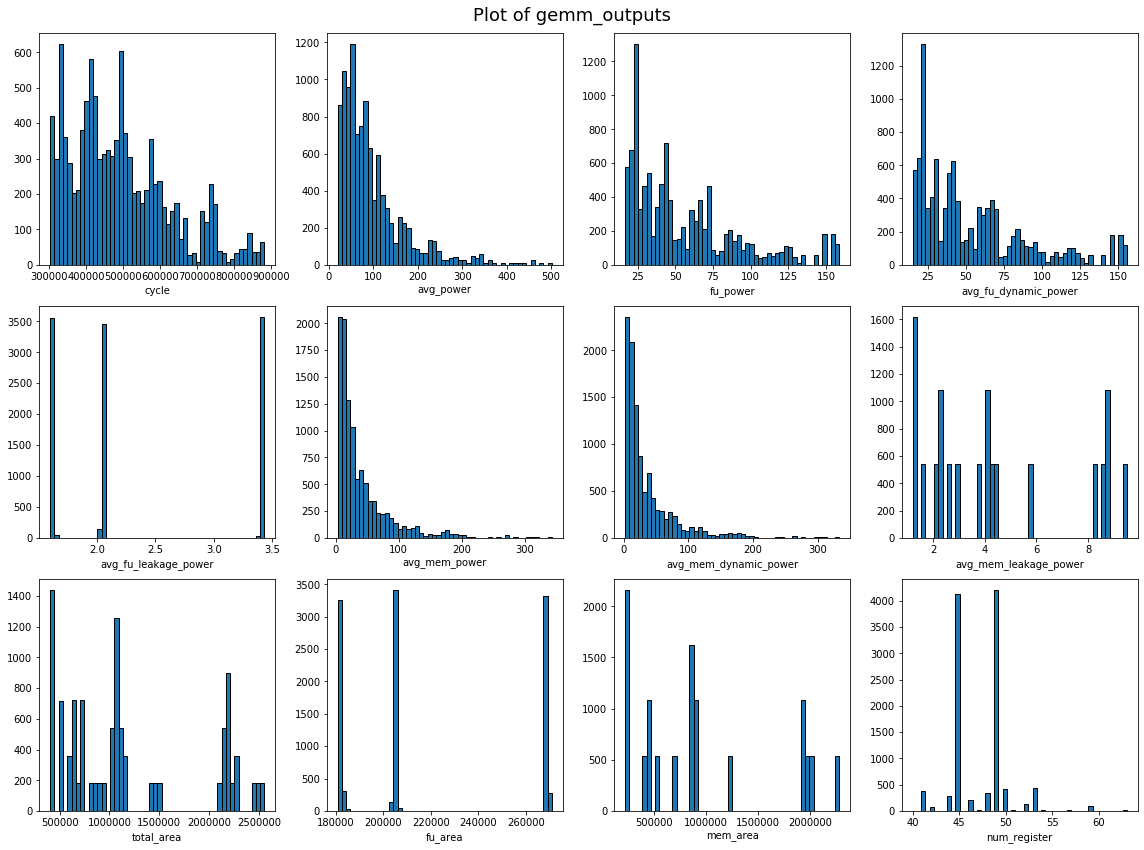

In [9]:
analysis(dataset_path=gemm_path,
         name="gemm",
         sep="\t",
         input_labels=gemm.input_labels,
         output_labels=gemm.output_labels)

Summary: smaug
----------------------------------------------
Number of rows: 3584

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit']

Final inputs: ['num_threads', 'l2_assoc', 'accel_clock_time', 'dma', 'acp', 'num_accels', 'l2_size']

Final outputs: ['total_time (ns)', 'total_accel_time (ns)', 'total_energy (nJ)', 'fu_energy (nJ)', 'spad_energy (nJ)', 'llc_leakage_energy (nJ)', 'llc_dynamic_energy (nJ)', 'total_area (uM^2)', 'fu_area', 'mem_area', 'num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter', 'num_register']

Saved figure to ../plots/notebook_plots/dataset_viz/smaug_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Saved figure to ../plots/notebook_plots/dataset_viz/smaug_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


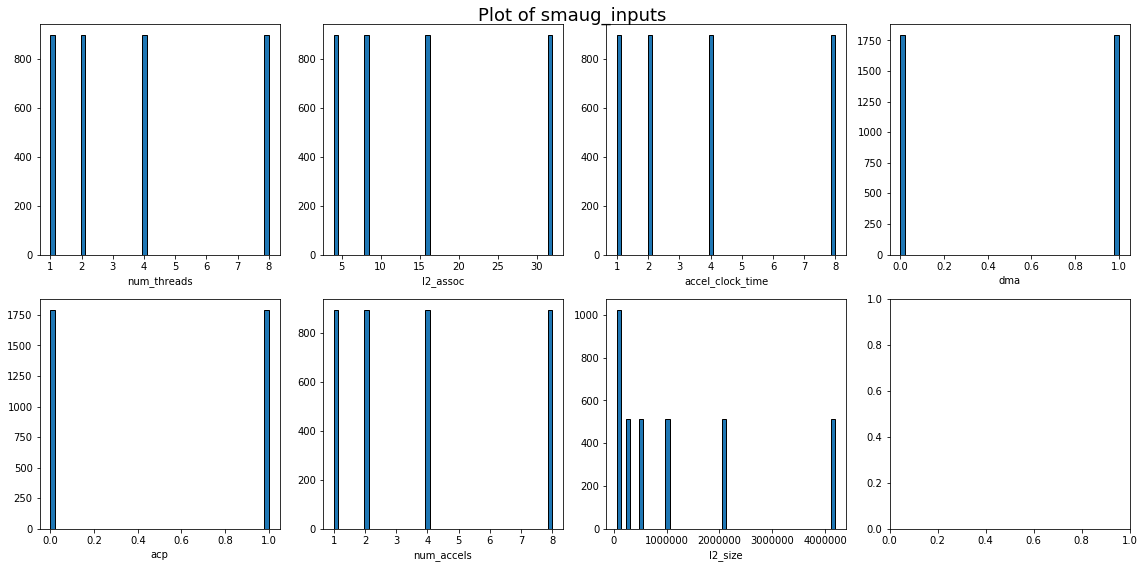

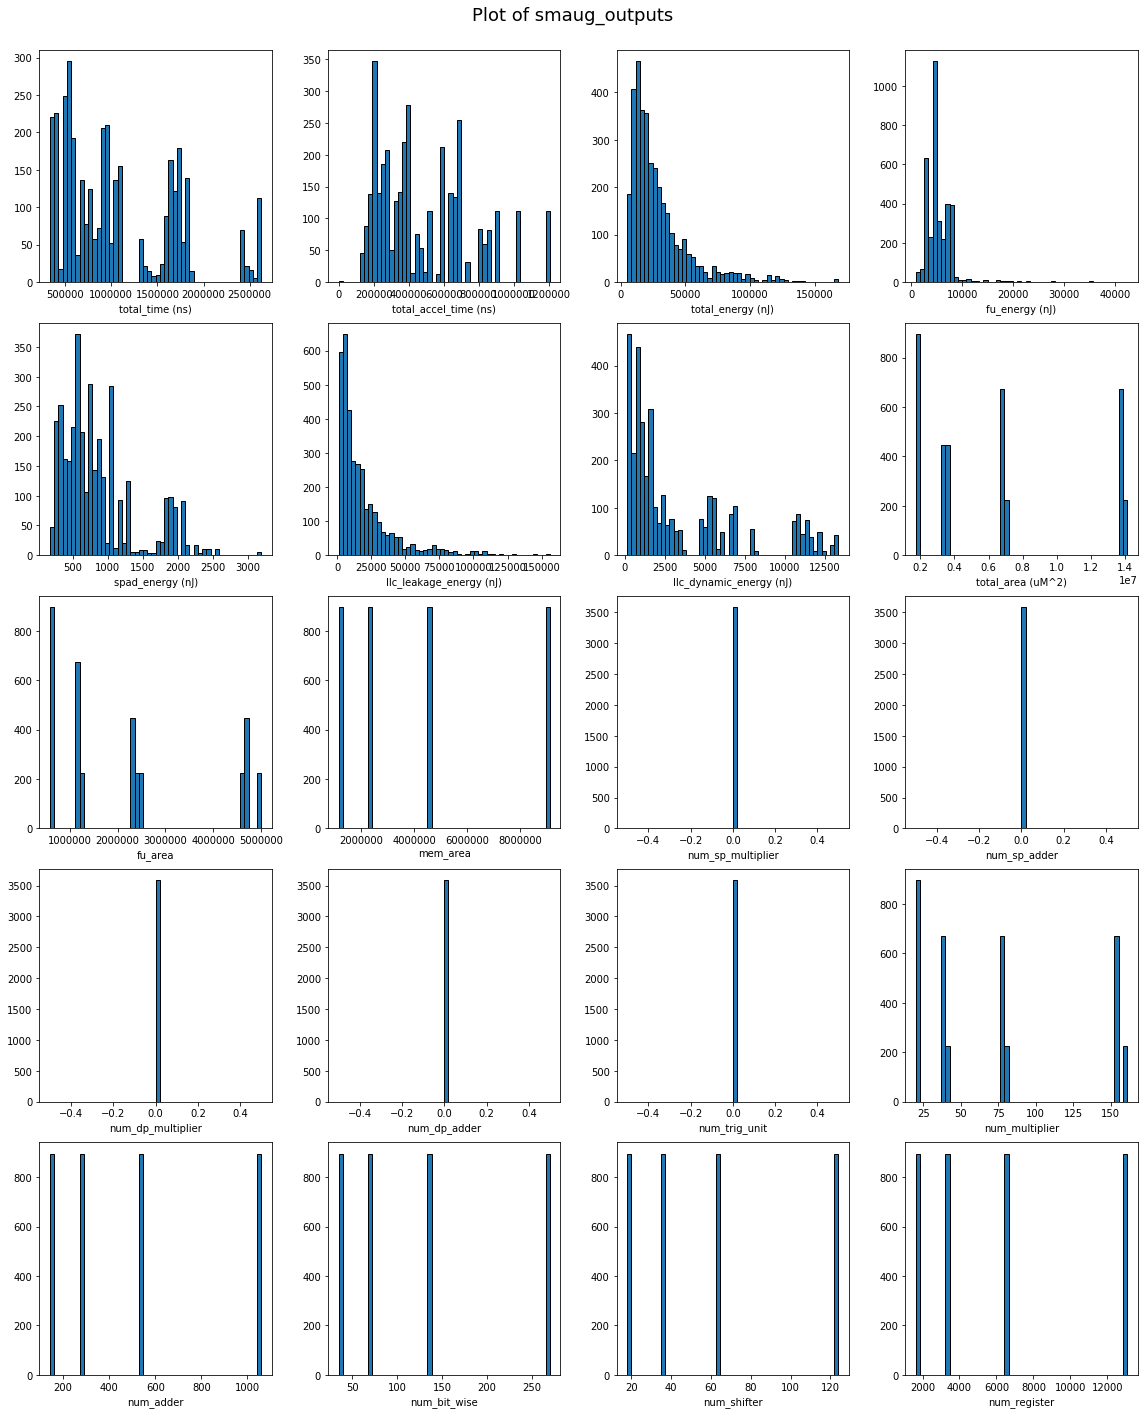

In [6]:
analysis(dataset_path=smaug_path,
         name="smaug",
         sep=",",
         input_labels=smaug.input_labels,
         output_labels=smaug.output_labels)